# Generate figures and tables

## Set up

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

fsize = 8
tsize = 8
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
# plot_kwargs = dict(marker='.', markersize=3, lw=1)
# errband_kwargs = dict(alpha=0.25)
errbar_kwargs = dict(estimator='mean', errorbar=('ci', 95), errwidth=1.25, capsize=0.05,)

save_dir = '../tmlr/figs/experiments'

In [2]:
task_label_map = {'1task_between': 'between', '1task_match_patt': 'match pattern', 'occurs': 'occurs', 'xoccurs': 'xoccurs', 'same': 'same'}

model_label_map = {
    'corelnet': 'CoRelNet','predinet': 'PrediNet',
    'transformer': 'Transformer', #'abstractor': 'Abstractor',
    'relconvnet': 'RelConvNet',
    # 'tempgroup_relconvnet': 'RelConvNet (Temporal G)',
    # 'featuregroup_relconvnet': 'RelConvNet (Feature G)',
    # 'contextgroup_relconvnet': 'RelConvNet (Contextual G)',
    'gru': 'GRU',
    'lstm': 'LSTM',
    'gcn': 'GCN',
    'gat': 'GAT',
    'gin': 'GIN',
    'cnn': 'CNN',
    }

cmap = plt.cm.tab10
color_map = {
    'CoRelNet': cmap(1), 'Abstractor': cmap(7),
    'PrediNet': cmap(3), 'Transformer': cmap(2),
    'RelConvNet': cmap(0),
    # 'RelConvNet (Temporal G)': cmap(9),
    # 'RelConvNet (Feature G)': cmap(6),
    # 'RelConvNet (Contextual G)': cmap(4),
    'LSTM': cmap(7), 'GRU': cmap(7),
    'GCN': cmap(6), 'GAT': cmap(4), 'GIN': cmap(8),
    'CNN': cmap(5),
    }

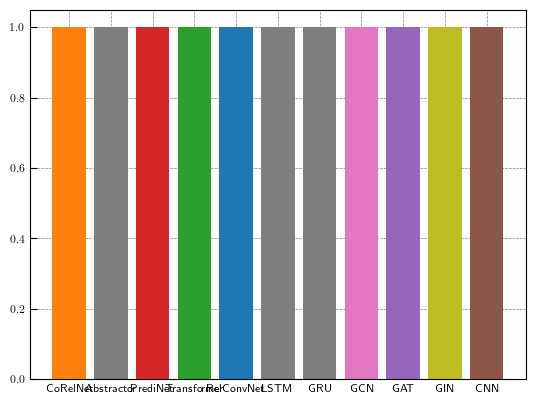

In [3]:
plt.bar(list(range(len(color_map))), 1, color=color_map.values());
plt.xticks(list(range(len(color_map))), color_map.keys());

## Relational Games

### OoD generalization table

In [89]:
results_df = pd.read_csv('figure_data/relational_games/end-of-training-accuracy.csv', index_col=0)
results_df

,group,name,stripes_acc,hexos_acc,acc,trial,task
0,cnn,trial = 4,0.9728,0.9864,0.9916,4,same
1,cnn,trial = 3,0.9790,0.9882,0.9954,3,same
2,cnn,trial = 2,0.9812,0.9942,0.9968,2,same
3,cnn,trial = 1,0.9726,0.9888,0.9984,1,same
4,cnn,trial = 0,0.9738,0.9926,0.9966,0,same
...,...,...,...,...,...,...,...
65,relconvnet,trial = 4,0.9940,0.9884,1.0000,4,1task_between
66,transformer,trial = 0,0.9284,0.9794,0.9880,0,1task_between
67,predinet,trial = 0,0.8770,0.9816,0.9950,0,1task_between
68,corelnet,trial = 0,0.5012,0.9940,1.0000,0,1task_between


In [90]:
results_df.groupby(['task', 'group']).aggregate(['mean', 'std', 'count'])

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\3053617087.py:1: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  results_df.groupby(['task', 'group']).aggregate(['mean', 'std', 'count'])


stripes_acc                 hexos_acc  \
                                             mean       std count      mean   
task          group                                                           
1task_between abstractor                  0.99936  0.000537     5   0.99924   
              cnn                         0.97076  0.006201     5   0.99016   
              contextgroup_relconvnet     0.97188  0.025980     5   0.99236   
              corelnet                    0.58192  0.140413     5   0.99548   
              featuregroup_relconvnet     0.98088  0.005863     5   0.99320   
...                                           ...       ...   ...       ...   
xoccurs       relconvnet                  0.94552  0.013424     5   0.96728   
              relconvnet_groupattn        0.67136  0.067941     5   0.81724   
              relnet                      0.92184  0.079067     5   0.95228   
              tempgroup_relconvnet        0.93896  0.027384     5   0.96336   
              transformer                 0.75272  0.070172     5   0.86732   

                                                           acc            \
                                            std count     mean       std   
task          group                                                        
1task_between abstractor               0.000329     5  0.99892  0.000867   
              cnn                      0.001941     5  0.99848  0.001064   
              contextgroup_relconvnet  0.003485     5  0.99996  0.000089   
              corelnet                 0.002834     5  1.00000  0.000000   
              featuregroup_relconvnet  0.002818     5  0.99976  0.000261   
...                                         ...   ...      ...       ...   
xoccurs       relconvnet               0.001803     5  0.99980  0.000447   
              relconvnet_groupattn     0.050009     5  0.98764  0.008651   
              relnet                   0.062810     5  0.95948  0.070672   
              tempgroup_relconvnet     0.014082     5  0.99900  0.002236   
              transformer              0.038340     5  0.90780  0.061124   

                                            trial                  
                                      count  mean       std count  
task          group                                                
1task_between abstractor                  5   2.0  1.581139     5  
              cnn                         5   2.0  1.581139     5  
              contextgroup_relconvnet     5   2.0  1.581139     5  
              corelnet                    5   2.0  1.581139     5  
              featuregroup_relconvnet     5   2.0  1.581139     5  
...                                     ...   ...       ...   ...  
xoccurs       relconvnet                  5   2.0  1.581139     5  
              relconvnet_groupattn        5   2.0  1.581139     5  
              relnet                      5   2.0  1.581139     5  
              tempgroup_relconvnet        5   2.0  1.581139     5  
              transformer                 5   2.0  1.581139     5  

[70 rows x 12 columns]

In [91]:
models = ['relconvnet', 'corelnet', 'predinet', 'transformer', 'cnn']
group_filter = results_df.group.isin(models)
results_df = results_df[group_filter]

results_df['group'] = pd.Categorical(results_df['group'], categories=models, ordered=True)
results_df.sort_values('group', inplace=True)
results_df

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\4203311359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['group'] = pd.Categorical(results_df['group'], categories=models, ordered=True)
C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\4203311359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.sort_values('group', inplace=True)


,group,name,stripes_acc,hexos_acc,acc,trial,task
69,relconvnet,trial = 0,0.9870,0.9902,1.0000,0,1task_between
67,relconvnet,trial = 0,0.9676,0.9910,1.0000,0,same
68,relconvnet,trial = 2,0.9824,0.9852,1.0000,2,same
69,relconvnet,trial = 1,0.9796,0.9924,1.0000,1,same
65,relconvnet,trial = 1,0.8796,0.9832,1.0000,1,1task_match_patt
...,...,...,...,...,...,...,...
0,cnn,trial = 4,0.9746,0.9878,0.9970,4,1task_between
1,cnn,trial = 1,0.9638,0.9910,0.9992,1,1task_between
2,cnn,trial = 2,0.9714,0.9908,0.9988,2,1task_between
4,cnn,trial = 0,0.9654,0.9886,0.9996,0,1task_between


In [92]:
tasks = ['same', '1task_between', 'occurs', 'xoccurs', '1task_match_patt']
results_df['task'] = pd.Categorical(results_df['task'], categories=tasks, ordered=True)
results_df.sort_values(['task', 'group'], inplace=True)
results_df

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\3798318473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['task'] = pd.Categorical(results_df['task'], categories=tasks, ordered=True)
C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\3798318473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.sort_values(['task', 'group'], inplace=True)


,group,name,stripes_acc,hexos_acc,acc,trial,task
67,relconvnet,trial = 0,0.9676,0.9910,1.0000,0,same
68,relconvnet,trial = 2,0.9824,0.9852,1.0000,2,same
69,relconvnet,trial = 1,0.9796,0.9924,1.0000,1,same
66,relconvnet,trial = 3,0.9730,0.9924,1.0000,3,same
65,relconvnet,trial = 4,0.9676,0.9830,1.0000,4,same
...,...,...,...,...,...,...,...
0,cnn,trial = 4,0.4894,0.4986,0.5008,4,1task_match_patt
1,cnn,trial = 2,0.4894,0.4986,0.5008,2,1task_match_patt
2,cnn,trial = 3,0.4894,0.4986,0.5008,3,1task_match_patt
3,cnn,trial = 1,0.4894,0.4986,0.5008,1,1task_match_patt


In [93]:
results_df['group'] = results_df['group'].map(model_label_map)

results_df['task'] = results_df['task'].map(task_label_map, na_action='ignore')

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\541118849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['group'] = results_df['group'].map(model_label_map)
C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\541118849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['task'] = results_df['task'].map(task_label_map, na_action='ignore')


In [94]:
results_df.rename(columns={'group': 'Model', 'task': 'Task'}, inplace=True)

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\2183473800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns={'group': 'Model', 'task': 'Task'}, inplace=True)


In [95]:
metric_cols = ['hexos_acc', 'stripes_acc']

agg_df = results_df.groupby(['Task', 'Model'])[metric_cols].aggregate(['mean', 'sem'])
agg_df = agg_df.round(3)
agg_df

hexos_acc        stripes_acc       
                               mean    sem        mean    sem
Task          Model                                          
same          RelConvNet      0.989  0.002       0.974  0.003
              CoRelNet        0.988  0.006       0.724  0.112
              PrediNet        0.990  0.004       0.983  0.007
              Transformer     0.997  0.001       0.993  0.004
              CNN             0.990  0.001       0.976  0.002
between       RelConvNet      0.991  0.001       0.988  0.002
              CoRelNet        0.995  0.001       0.582  0.063
              PrediNet        0.978  0.006       0.950  0.019
              Transformer     0.986  0.003       0.961  0.010
              CNN             0.990  0.001       0.971  0.003
occurs        RelConvNet      0.980  0.001       0.880  0.015
              CoRelNet        0.992  0.004       0.518  0.012
              PrediNet        0.907  0.020       0.775  0.046
              Transformer     0.881  0.015       0.724  0.021
              CNN             0.984  0.008       0.953  0.012
xoccurs       RelConvNet      0.967  0.001       0.946  0.006
              CoRelNet        0.980  0.007       0.606  0.035
              PrediNet        0.872  0.036       0.810  0.028
              Transformer     0.867  0.017       0.753  0.031
              CNN             0.597  0.097       0.590  0.084
match pattern RelConvNet      0.961  0.015       0.870  0.041
              CoRelNet        0.942  0.011       0.581  0.026
              PrediNet        0.710  0.040       0.658  0.053
              Transformer     0.627  0.005       0.591  0.006
              CNN             0.499  0.000       0.489  0.000

In [96]:
agg_df.columns = [' '.join(col).strip() for col in agg_df.columns.values]

In [97]:
agg_df

hexos_acc mean  hexos_acc sem  stripes_acc mean  \
Task          Model                                                          
same          RelConvNet            0.989          0.002             0.974   
              CoRelNet              0.988          0.006             0.724   
              PrediNet              0.990          0.004             0.983   
              Transformer           0.997          0.001             0.993   
              CNN                   0.990          0.001             0.976   
between       RelConvNet            0.991          0.001             0.988   
              CoRelNet              0.995          0.001             0.582   
              PrediNet              0.978          0.006             0.950   
              Transformer           0.986          0.003             0.961   
              CNN                   0.990          0.001             0.971   
occurs        RelConvNet            0.980          0.001             0.880   
              CoRelNet              0.992          0.004             0.518   
              PrediNet              0.907          0.020             0.775   
              Transformer           0.881          0.015             0.724   
              CNN                   0.984          0.008             0.953   
xoccurs       RelConvNet            0.967          0.001             0.946   
              CoRelNet              0.980          0.007             0.606   
              PrediNet              0.872          0.036             0.810   
              Transformer           0.867          0.017             0.753   
              CNN                   0.597          0.097             0.590   
match pattern RelConvNet            0.961          0.015             0.870   
              CoRelNet              0.942          0.011             0.581   
              PrediNet              0.710          0.040             0.658   
              Transformer           0.627          0.005             0.591   
              CNN                   0.499          0.000             0.489   

                           stripes_acc sem  
Task          Model                         
same          RelConvNet             0.003  
              CoRelNet               0.112  
              PrediNet               0.007  
              Transformer            0.004  
              CNN                    0.002  
between       RelConvNet             0.002  
              CoRelNet               0.063  
              PrediNet               0.019  
              Transformer            0.010  
              CNN                    0.003  
occurs        RelConvNet             0.015  
              CoRelNet               0.012  
              PrediNet               0.046  
              Transformer            0.021  
              CNN                    0.012  
xoccurs       RelConvNet             0.006  
              CoRelNet               0.035  
              PrediNet               0.028  
              Transformer            0.031  
              CNN                    0.084  
match pattern RelConvNet             0.041  
              CoRelNet               0.026  
              PrediNet               0.053  
              Transformer            0.006  
              CNN                    0.000

In [98]:
agg_df['Hexos Accuracy'] = agg_df.apply(lambda x: f"${x['hexos_acc mean']:0.3f} \pm {x['hexos_acc sem']:0.3f}$", axis=1)
agg_df['Stripes Accuracy'] = agg_df.apply(lambda x: f"${x['stripes_acc mean']:0.3f} \pm {x['stripes_acc sem']:0.3f}$", axis=1)

In [99]:
agg_df = agg_df[['Hexos Accuracy', 'Stripes Accuracy']]
agg_df

Hexos Accuracy   Stripes Accuracy
Task          Model                                            
same          RelConvNet   $0.989 \pm 0.002$  $0.974 \pm 0.003$
              CoRelNet     $0.988 \pm 0.006$  $0.724 \pm 0.112$
              PrediNet     $0.990 \pm 0.004$  $0.983 \pm 0.007$
              Transformer  $0.997 \pm 0.001$  $0.993 \pm 0.004$
              CNN          $0.990 \pm 0.001$  $0.976 \pm 0.002$
between       RelConvNet   $0.991 \pm 0.001$  $0.988 \pm 0.002$
              CoRelNet     $0.995 \pm 0.001$  $0.582 \pm 0.063$
              PrediNet     $0.978 \pm 0.006$  $0.950 \pm 0.019$
              Transformer  $0.986 \pm 0.003$  $0.961 \pm 0.010$
              CNN          $0.990 \pm 0.001$  $0.971 \pm 0.003$
occurs        RelConvNet   $0.980 \pm 0.001$  $0.880 \pm 0.015$
              CoRelNet     $0.992 \pm 0.004$  $0.518 \pm 0.012$
              PrediNet     $0.907 \pm 0.020$  $0.775 \pm 0.046$
              Transformer  $0.881 \pm 0.015$  $0.724 \pm 0.021$
              CNN          $0.984 \pm 0.008$  $0.953 \pm 0.012$
xoccurs       RelConvNet   $0.967 \pm 0.001$  $0.946 \pm 0.006$
              CoRelNet     $0.980 \pm 0.007$  $0.606 \pm 0.035$
              PrediNet     $0.872 \pm 0.036$  $0.810 \pm 0.028$
              Transformer  $0.867 \pm 0.017$  $0.753 \pm 0.031$
              CNN          $0.597 \pm 0.097$  $0.590 \pm 0.084$
match pattern RelConvNet   $0.961 \pm 0.015$  $0.870 \pm 0.041$
              CoRelNet     $0.942 \pm 0.011$  $0.581 \pm 0.026$
              PrediNet     $0.710 \pm 0.040$  $0.658 \pm 0.053$
              Transformer  $0.627 \pm 0.005$  $0.591 \pm 0.006$
              CNN          $0.499 \pm 0.000$  $0.489 \pm 0.000$

In [100]:
confirm = input('overwrite latex table?')
latex_table = agg_df.to_latex(escape=False)
latex_table_file = f'{save_dir}/generalization_table.tex'
if confirm=='y':
    with open(latex_table_file, 'w') as f:
        f.write(latex_table)
else:
    print('did not overwrite')

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\166777792.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = agg_df.to_latex(escape=False)


In [45]:
results_df.groupby(['Task', 'Model'])[metric_cols].aggregate(['mean', 'sem', 'min', 'max'])

hexos_acc                           stripes_acc  \
                               mean       sem     min     max        mean   
Task          Model                                                         
same          RelConvNet    0.98880  0.001967  0.9830  0.9924     0.97404   
              CoRelNet      0.98796  0.005756  0.9696  1.0000     0.72396   
              PrediNet      0.99020  0.004153  0.9788  1.0000     0.98348   
              Transformer   0.99668  0.001481  0.9910  0.9996     0.99268   
              CNN           0.99004  0.001450  0.9864  0.9942     0.97588   
between       RelConvNet    0.99088  0.000786  0.9884  0.9930     0.98784   
              CoRelNet      0.99548  0.001267  0.9928  0.9996     0.58192   
              PrediNet      0.97764  0.005641  0.9556  0.9874     0.95008   
              Transformer   0.98604  0.002834  0.9794  0.9932     0.96068   
              CNN           0.99016  0.000868  0.9878  0.9926     0.97076   
occurs        RelConvNet    0.98024  0.001398  0.9754  0.9838     0.87968   
              CoRelNet      0.99248  0.003571  0.9788  0.9988     0.51776   
              PrediNet      0.90668  0.020034  0.8554  0.9666     0.77452   
              Transformer   0.88072  0.015305  0.8320  0.9184     0.72432   
              CNN           0.98376  0.007772  0.9530  0.9950     0.95300   
xoccurs       RelConvNet    0.96728  0.000806  0.9660  0.9698     0.94552   
              CoRelNet      0.98028  0.007287  0.9644  0.9980     0.60560   
              PrediNet      0.87236  0.035602  0.7362  0.9306     0.80960   
              Transformer   0.86732  0.017146  0.8038  0.9030     0.75272   
              CNN           0.59732  0.096520  0.5008  0.9834     0.59004   
match pattern RelConvNet    0.96092  0.015495  0.9004  0.9834     0.87004   
              CoRelNet      0.94156  0.011005  0.8996  0.9600     0.58096   
              PrediNet      0.71020  0.039550  0.6134  0.7832     0.65840   
              Transformer   0.62664  0.004621  0.6132  0.6404     0.59064   
              CNN           0.49860  0.000000  0.4986  0.4986     0.48940   

                                                     
                                sem     min     max  
Task          Model                                  
same          RelConvNet   0.003040  0.9676  0.9824  
              CoRelNet     0.112458  0.4952  0.9998  
              PrediNet     0.007259  0.9628  1.0000  
              Transformer  0.004428  0.9750  0.9978  
              CNN          0.001769  0.9726  0.9812  
between       RelConvNet   0.001920  0.9830  0.9940  
              CoRelNet     0.062794  0.5012  0.8308  
              PrediNet     0.018593  0.8770  0.9750  
              Transformer  0.009568  0.9284  0.9852  
              CNN          0.002773  0.9638  0.9786  
occurs        RelConvNet   0.015461  0.8238  0.9120  
              CoRelNet     0.012050  0.4952  0.5612  
              PrediNet     0.046328  0.6964  0.9520  
              Transformer  0.020893  0.6668  0.7760  
              CNN          0.012184  0.9058  0.9730  
xoccurs       RelConvNet   0.006004  0.9350  0.9608  
              CoRelNet     0.034678  0.5128  0.7076  
              PrediNet     0.028230  0.7440  0.9012  
              Transformer  0.031382  0.6496  0.8396  
              CNN          0.083840  0.5062  0.9254  
match pattern RelConvNet   0.040650  0.7228  0.9484  
              CoRelNet     0.026195  0.4954  0.6588  
              PrediNet     0.052888  0.5098  0.7662  
              Transformer  0.005503  0.5728  0.6074  
              CNN          0.000000  0.4894  0.4894

### Plots of OoD Generalization

In [46]:
results_df.rename(columns={'hexos_acc': 'Hexos Accuracy', 'stripes_acc': 'Stripes Accuracy'}, inplace=True)

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\1989270871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns={'hexos_acc': 'Hexos Accuracy', 'stripes_acc': 'Stripes Accuracy'}, inplace=True)


In [47]:
results_df_hexos = results_df.copy()
results_df_hexos['Split'] = 'Hexos'
results_df_hexos['Accuracy'] = results_df_hexos['Hexos Accuracy']
results_df_hexos.drop(columns=['Hexos Accuracy', 'Stripes Accuracy', 'acc'], inplace=True)

results_df_stripes = results_df.copy()
results_df_stripes['Split'] = 'Stripes'
results_df_stripes['Accuracy'] = results_df_stripes['Stripes Accuracy']
results_df_stripes.drop(columns=['Hexos Accuracy', 'Stripes Accuracy', 'acc'], inplace=True)

results_df_ = pd.concat([results_df_hexos, results_df_stripes], axis=0)
results_df_

,Model,name,trial,Task,Split,Accuracy
67,RelConvNet,trial = 0,0,same,Hexos,0.9910
68,RelConvNet,trial = 2,2,same,Hexos,0.9852
69,RelConvNet,trial = 1,1,same,Hexos,0.9924
66,RelConvNet,trial = 3,3,same,Hexos,0.9924
65,RelConvNet,trial = 4,4,same,Hexos,0.9830
...,...,...,...,...,...,...
0,CNN,trial = 4,4,match pattern,Stripes,0.4894
1,CNN,trial = 2,2,match pattern,Stripes,0.4894
2,CNN,trial = 3,3,match pattern,Stripes,0.4894
3,CNN,trial = 1,1,match pattern,Stripes,0.4894


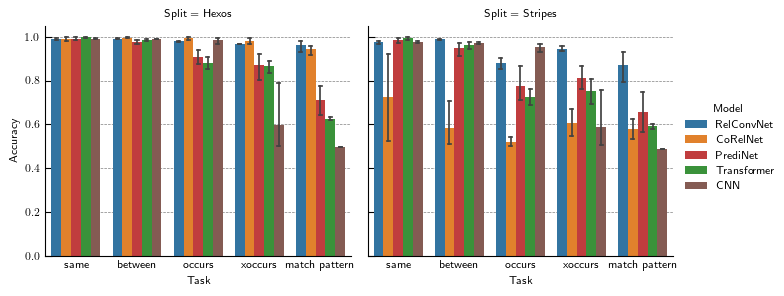

In [48]:
fig = sns.catplot(
    results_df_, kind='bar', col='Split', x='Task', y='Accuracy', hue='Model',
    sharey=True, legend='auto', legend_out=True, palette=color_map, **errbar_kwargs, height=3, aspect=1.15)
fig.savefig(f'{save_dir}/relgames_ood_acc.pdf')

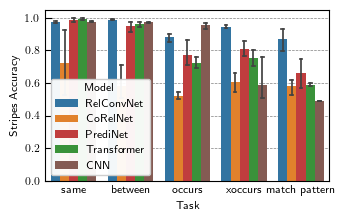

In [49]:
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.barplot(results_df, y='Stripes Accuracy', x='Task', hue='Model', palette=color_map, **errbar_kwargs, ax=ax)
sns.move_legend(ax, "lower left", fancybox=True, frameon=True, framealpha=0.95)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/stripes_acc.pdf')

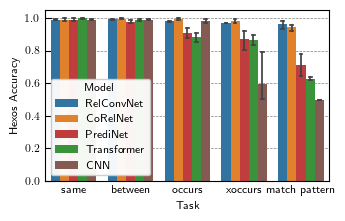

In [50]:
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.barplot(results_df, y='Hexos Accuracy', x='Task', hue='Model', palette=color_map, **errbar_kwargs, ax=ax)
sns.move_legend(ax, "lower left", fancybox=True, frameon=True, framealpha=0.95)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/hexos_acc.pdf')

### Training curve figures

In [60]:
run_histories = pd.read_csv('figure_data/relational_games/project_run_histories.csv', index_col=0)
run_histories.head()

,_timestamp,epoch/loss,stripes_loss,acc,hexos_acc,_step,batch/acc,epoch/val_acc,stripes_acc,batch/batch_step,...,_runtime,hexos_loss,batch/loss,epoch/acc,epoch/epoch,loss,trial,group,name,task
0,1.721519e+09,NaN,NaN,NaN,NaN,0,0.474609,NaN,NaN,0.0,...,23.128970,NaN,0.693449,NaN,NaN,NaN,4,cnn,trial = 4,same
1,1.721519e+09,NaN,NaN,NaN,NaN,1,0.493164,NaN,NaN,1.0,...,23.141707,NaN,0.693207,NaN,NaN,NaN,4,cnn,trial = 4,same
2,1.721519e+09,NaN,NaN,NaN,NaN,2,0.496745,NaN,NaN,2.0,...,23.155033,NaN,0.693069,NaN,NaN,NaN,4,cnn,trial = 4,same
3,1.721519e+09,NaN,NaN,NaN,NaN,3,0.495605,NaN,NaN,3.0,...,23.166190,NaN,0.693427,NaN,NaN,NaN,4,cnn,trial = 4,same
4,1.721519e+09,NaN,NaN,NaN,NaN,4,0.496875,NaN,NaN,4.0,...,23.177453,NaN,0.693301,NaN,NaN,NaN,4,cnn,trial = 4,same


In [70]:
tasks = ['same', '1task_between', 'occurs', 'xoccurs', '1task_match_patt']

def get_task_run_histories(run_histories, task):
    # task_filter
    task_filter = run_histories.task == task
    task_run_histories = run_histories[task_filter]

    # model filter / sorting
    models = ['relconvnet', 'corelnet', 'predinet', 'transformer', 'cnn']
    group_filter = task_run_histories.group.isin(models)
    task_run_histories = task_run_histories[group_filter]

    task_run_histories['group'] = pd.Categorical(task_run_histories['group'], categories=models, ordered=True)
    task_run_histories.sort_values('group', inplace=True)
    task_run_histories['group'] = task_run_histories['group'].map(model_label_map)
    task_run_histories.rename(columns={'group': 'Model'}, inplace=True)

    return task_run_histories

In [71]:
max_batch = 2000
step_size = 25
batch_steps_keep = np.arange(0, max_batch + 1, step_size)

In [ ]:
for task in tasks:
    task_run_histories = get_task_run_histories(run_histories, task)
    batch_filter = task_run_histories['batch/batch_step'].isin(batch_steps_keep)
    task_run_histories = task_run_histories[batch_filter]
    task_run_histories.rename(columns={'batch/batch_step': 'batch step', 'batch/acc': 'training accuracy'}, inplace=True)
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.lineplot(task_run_histories, y='training accuracy', x='batch step', hue='Model', estimator='mean', errorbar=('ci', 95), ax=ax)
    ax.set_title(task_label_map.get(task, task))
    sns.move_legend(ax, "lower right", fancybox=True, frameon=True, framealpha=0.95)
    fig.set_tight_layout(True)
    # fig.savefig(f'{save_dir}/{task}_training_curves.pdf')

In [ ]:
model_label_map

{'corelnet': 'CoRelNet',
 'predinet': 'PrediNet',
 'transformer': 'Transformer',
 'relconvnet': 'RelConvNet',
 'gru': 'GRU',
 'lstm': 'LSTM',
 'gcn': 'GCN',
 'gat': 'GAT',
 'gin': 'GIN',
 'cnn': 'CNN'}

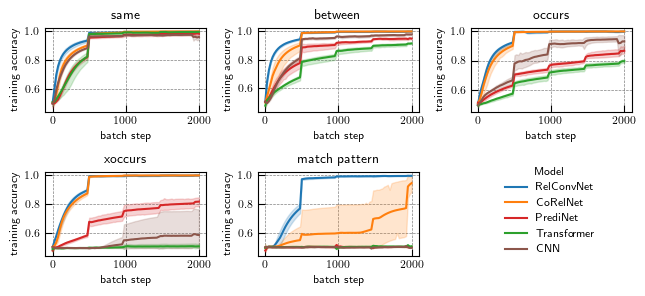

In [78]:
fig = plt.figure(figsize=(6.5,3))

axes = []
for i, task in enumerate(tasks):
    task_run_histories = get_task_run_histories(run_histories, task)
    batch_filter = task_run_histories['batch/batch_step'].isin(batch_steps_keep)
    task_run_histories = task_run_histories[batch_filter]
    task_run_histories.rename(columns={'batch/batch_step': 'batch step', 'batch/acc': 'training accuracy'}, inplace=True)
    ax = fig.add_subplot(2, 3, i+1)
    sns.lineplot(task_run_histories, y='training accuracy', x='batch step', hue='Model',
        palette=color_map, estimator='mean',errorbar=('ci', 95), legend=False, ax=ax)
    ax.set_title(task_label_map.get(task, task))
    axes.append(ax)

# NOTE legend labels are hard-coded
fig.legend(handles=ax.get_lines(), labels=['RelConvNet', 'CoRelNet', 'PrediNet', 'Transformer', 'CNN'],  loc=(0.775, 0.125), title='Model', frameon=False)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/all_training_curves.pdf')

## Contains 'SET'

### End-of-training accuracy

In [79]:
results_df = pd.read_csv('figure_data/contains_set/end-of-training-accuracy.csv')
models = ['relconvnet', 'corelnet', 'predinet', 'transformer', 'gcn', 'gat', 'gin', 'lstm', 'gru', 'cnn']
group_filter = results_df.group.isin(models)
results_df = results_df[group_filter]

results_df['group'] = pd.Categorical(results_df['group'], categories=models, ordered=True)
results_df.sort_values('group', inplace=True)
results_df['group'] = results_df['group'].map(model_label_map)
results_df.rename(columns={'group': 'Model', 'acc': 'Accuracy'}, inplace=True)

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\2075021020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_['Model'] = pd.Categorical(results_df_['Model'], categories=models, ordered=True)


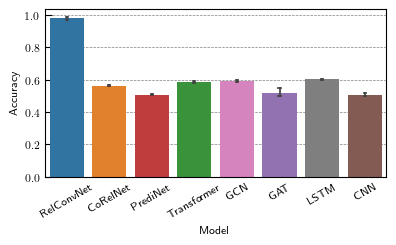

In [80]:
models = [model_label_map[m] for m in ('relconvnet', 'corelnet', 'predinet', 'transformer', 'gcn', 'gat', 'lstm', 'cnn')]
results_df_ = results_df[results_df.Model.isin(models)]
results_df_['Model'] = pd.Categorical(results_df_['Model'], categories=models, ordered=True)
fig, ax = plt.subplots(figsize=(4, 2.5))
sns.barplot(results_df_, y='Accuracy', x='Model', **errbar_kwargs, palette=color_map, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_acc.pdf')

### End-of-training acc table

In [81]:
agg_df = results_df.groupby(['Model'])['Accuracy'].aggregate(['mean', 'sem'])
agg_df = agg_df.round(3)
agg_df

,mean,sem
Model,,
RelConvNet,0.979,0.006
CoRelNet,0.563,0.001
PrediNet,0.508,0.002
Transformer,0.584,0.004
GCN,0.595,0.003
GAT,0.517,0.015
GIN,0.590,0.003
LSTM,0.602,0.003
GRU,0.593,0.004


In [82]:
agg_df['Accuracy'] = agg_df.apply(lambda x: f"${x['mean']:0.3f} \pm {x['sem']:0.3f}$", axis=1)
agg_df = agg_df[['Accuracy']]
agg_df

,Accuracy
Model,
RelConvNet,$0.979 \pm 0.006$
CoRelNet,$0.563 \pm 0.001$
PrediNet,$0.508 \pm 0.002$
Transformer,$0.584 \pm 0.004$
GCN,$0.595 \pm 0.003$
GAT,$0.517 \pm 0.015$
GIN,$0.590 \pm 0.003$
LSTM,$0.602 \pm 0.003$
GRU,$0.593 \pm 0.004$


In [83]:
confirm = input('overwrite latex table?')
latex_table = agg_df.to_latex(escape=False)
latex_table_file = f'{save_dir}/set_acc_table.tex'
if confirm == 'y':
    with open(latex_table_file, 'w') as f:
        f.write(latex_table)
else:
    print('did not overwrite')

C:\Users\awnya\AppData\Local\Temp\ipykernel_35572\3401020537.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = agg_df.to_latex(escape=False)


### Training curves

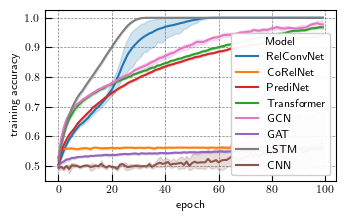

In [84]:
task_run_histories = pd.read_csv('figure_data/contains_set/run_history.csv', index_col=0)

# model filter / sorting
models = ['relconvnet', 'corelnet', 'predinet', 'transformer', 'gcn', 'gat', 'lstm', 'cnn',]
group_filter = task_run_histories.group.isin(models)
task_run_histories = task_run_histories[group_filter]

task_run_histories['group'] = pd.Categorical(task_run_histories['group'], categories=models, ordered=True)
task_run_histories.sort_values('group', inplace=True)
task_run_histories['group'] = task_run_histories['group'].map(model_label_map)
task_run_histories.rename(columns={'group': 'Model'}, inplace=True)
task_run_histories.rename(columns={'epoch/epoch': 'epoch', 'epoch/acc': 'training accuracy'}, inplace=True)
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.lineplot(task_run_histories, y='training accuracy', x='epoch', hue='Model', palette=color_map, estimator='mean', errorbar=('ci', 95), ax=ax)
sns.move_legend(ax, loc='lower right', fancybox=True, frameon=True, framealpha=0.95)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_training_curves_trainacc.pdf')

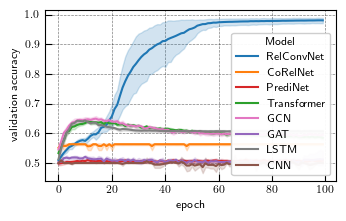

In [85]:
task_run_histories = pd.read_csv('figure_data/contains_set/run_history.csv', index_col=0)

# model filter / sorting
models = ['relconvnet', 'corelnet', 'predinet', 'transformer', 'gcn', 'gat', 'lstm', 'cnn',]
group_filter = task_run_histories.group.isin(models)
task_run_histories = task_run_histories[group_filter]

task_run_histories['group'] = pd.Categorical(task_run_histories['group'], categories=models, ordered=True)
task_run_histories.sort_values('group', inplace=True)
task_run_histories['group'] = task_run_histories['group'].map(model_label_map)
task_run_histories.rename(columns={'group': 'Model'}, inplace=True)
task_run_histories.rename(columns={'epoch/epoch': 'epoch', 'epoch/val_acc': 'validation accuracy'}, inplace=True)
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.lineplot(task_run_histories, y='validation accuracy', x='epoch', palette=color_map, hue='Model', estimator='mean', errorbar=('ci', 95), ax=ax)
sns.move_legend(ax, loc='lower right', fancybox=True, frameon=True, framealpha=0.95)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_training_curves_valacc.pdf')

In [86]:
task_run_histories = pd.read_csv('figure_data/contains_set/run_history.csv', index_col=0)
models = ['relconvnet', 'corelnet', 'predinet', 'transformer', 'gcn', 'gat', 'lstm', 'cnn']
group_filter = task_run_histories.group.isin(models)
task_run_histories = task_run_histories[group_filter]

task_run_histories['group'] = pd.Categorical(task_run_histories['group'], categories=models, ordered=True)
task_run_histories.sort_values('group', inplace=True)
task_run_histories['group'] = task_run_histories['group'].map(model_label_map)
task_run_histories.rename(columns={'group': 'Model', 'epoch/epoch': 'epoch'}, inplace=True)

hist_train = task_run_histories.copy()
hist_train['Split'] = 'Train'
hist_train['Accuracy'] = task_run_histories['epoch/acc']

hist_val = task_run_histories.copy()
hist_val['Split'] = 'Validation'
hist_val['Accuracy'] = task_run_histories['epoch/val_acc']

hist_df = pd.concat([hist_train, hist_val], axis=0)
hist_df.reset_index(inplace=True)

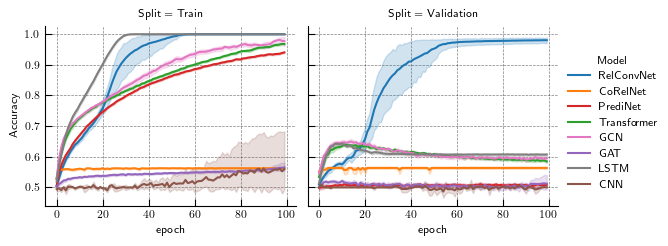

In [87]:
fig = sns.relplot(hist_df, y='Accuracy', x='epoch', hue='Model', col='Split', palette=color_map, kind='line', estimator='mean', errorbar=('ci', 95), height=2.5, aspect=1.15)
fig.savefig(f'{save_dir}/contains_set_training_curves.pdf')